## Final Project Submission

Please fill out:
* Student name: Ivyne Atieng
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Asha Deen | Lucille Kahella
* Blog post URL:


### MICROSOFT FILM ANALYSIS

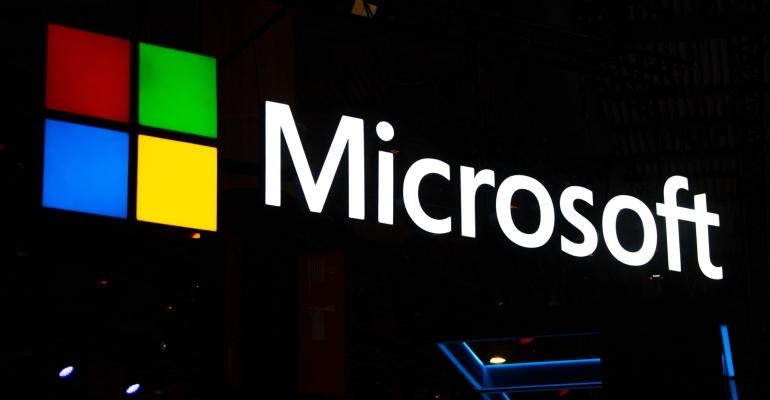

### Project Overview
This analysis is for Microsoft and they want me to use this analysis to generate insights for the business stakeholder

### Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create:
This analysis will answer the following questions:
- What genres are the most rated ?
- What genres have the most number of votes ?
- What is the most profitable genre ?

### Data Understanding

For the analysis I will be using movie datasets from:
- [Box Office Mojo](https://www.boxofficemojo.com)
- [IMDB](https://www.imdb.com/)
- [Rotten Tomatoes](https://www.rottentomatoes.com/)
- [TheMovieDB](https://www.themoviedb.org/)
- [The numbers](https://www.the-numbers.com/)


Because it was collected from various locations, the different files have different formats. 
Some are compressed CSV (comma-separated values) or TSV (tab-separated values) files that can be opened using spreadsheet software
or pd.read_csv, while the data from IMDB is located in a SQLite database.This is the ERD for the
IMBD data as showm below

![movie data erd](https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-1-project-v2-4/master/movie_data_erd.jpeg)

In [3]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3

%matplotlib inline
import seaborn as sns


### Data Exploration
#### Looking general overview of my data
  

- Reading the Box Office Mojo Dataset

In [4]:
# Reading the bom.movie csv
bom_df = pd.read_csv("data/bom.movie_gross.csv")

bom_df.head(3)
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
# Getting the summary of the Box office Mojo dataset
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


- Reading the Rotten Tomato dataset

In [6]:
# Reading the movie info df
movies_df= pd.read_csv("data/rt.movie_info.tsv",sep ="\t")
movies_df.head(3)
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


- Reading the movie database dataset

In [7]:
# Reading the tmdb movies
tmdb_df = pd.read_csv("data/tmdb.movies.csv", index_col =0)
tmdb_df.head(3)
tmdb_df.info()
tmdb_df

<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


- Reading the rotten tomato review dataset

In [8]:

reviews_df = pd.read_csv("data/rt.reviews.tsv", sep= '\t',encoding= 'latin1')
reviews_df.head(3)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"


In [9]:
# Getting the info of reviews Dataset
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [10]:
# Reading the movie_budgets.csv
budgets_df = pd.read_csv("data/tn.movie_budgets.csv",encoding='latin1')
budgets_df.head(3)

# Getting the general information of the budgets_df
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### Exploring the Movie Database

In [11]:
# Conecting database to sqlite3
conn = sqlite3.connect("data/im.db")
conn

In [12]:
# Checking the tables we have have in im.db
tables =pd.read_sql("""
SELECT *
  FROM sqlite_master;""",conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


**I will focus on the movie_basics and the movie_ratings table from the The MovieDB**

In [13]:
# Reading the movie basics table
movie_basics_df =pd.read_sql("""
SELECT*
FROM movie_basics;"""
,conn)
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [14]:
# Reading the movie_ratings table
movie_ratings_df =pd.read_sql("""
SELECT*
FROM movie_ratings;"""
,conn)
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [15]:
# Joining the movie_basics and the movie_ratings tables

q1 = ("""
SELECT *
FROM movie_basics
  JOIN movie_ratings
   USING(movie_id);
""")
combined_df = pd.read_sql(q1, conn)
combined_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [16]:
# Getting the overall information of the two tables
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


## Data Cleaning

- Cleaning the combined_df dataset

In [17]:
# Checking for duplicates
combined_df.duplicated().sum()

0

In [58]:
# Checking for null values in combined_df
combined_df.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

combined_df has a total 73856 rows but the runtime_minutes has 7620 null values  that is the most 
total null values in the combined_df. So if I drop the rows it will will not affect my data analysis that nuch

In [19]:
# Dropping all rows
combined_df.dropna(inplace = True)

- Data cleaning of the Boxoffice Mojo 

In [20]:
# Checking for duplicates
bom_df.duplicated().sum()
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [21]:
# Checking for null values in the Boxoffice Mojo
bom_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

- Data cleaning of the Rotten Tomato movie_info

In [22]:
# Checking for duplicates in the movie df dataset
movies_df.duplicated().sum()

0

In [23]:
# Checking for null values in the movies_df dataset
movies_df.isna().sum()
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


Looking at the movies_df dataset the currency, box_office and studio columns are alot of null values more that three
quarter of each colum has null values

In [24]:
movies_df.drop(columns =["currency","box_office","studio"],inplace = True)

In [25]:
# Drop all the rows in the movies_df that has null values
movies_df.dropna(inplace =True)

# checking wether movies_df dataset still has null values
movies_df.isna().sum()

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
runtime         0
dtype: int64

- Data cleaning of the tmdb movies dataset

In [26]:
# Checking for duplicates in the tmdb movies dataset
tmdb_df.duplicated().sum()

# There are 1020 dupicates in the tmdb novies dataset

# Dropping the duplicates in the tmdb movies dataset
tmdb_df.drop_duplicates(inplace =True)

In [27]:
# Checking for null values in the tmdb movies dataset
tmdb_df.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

- Cleaning the Rotten tomatos reviews csv

In [28]:
# Checking for duplicates in the rotten tomato reviews dataset
reviews_df.duplicated().sum()

# tomato reviews has 9 duplicates
reviews_df.drop_duplicates(inplace =True)

In [29]:
# Checking for null values in the rotten tomato reviews dataset
reviews_df.isna().sum()
# reviews_df.info()

# Dropping all the null values in the rotten tomato dataset
reviews_df.dropna(inplace =True)

# Checking if there is still any null values remaining in the tomato reviews dataset
# There is no null value remaining in the rotten tomato tomato dataset
reviews_df.isna().sum()

id            0
review        0
rating        0
fresh         0
critic        0
top_critic    0
publisher     0
date          0
dtype: int64

- Cleaning the rotten tomatoes reviews csv

In [30]:
# Checking for duplicates in the movie budgets dataset
budgets_df.duplicated().sum()

# tomato reviews has 9 duplicates
budgets_df.drop_duplicates(inplace =True)

In [31]:
# Checking for null values in the movie budgets dataset
budgets_df.isna().sum()
# budgets_df.info()

# Dropping all the null values in the budgets dataset
budgets_df.dropna(inplace =True)

# Checking if there is still any null values remaining in the movies budgets dataset
# There is no null value remaining in the movies budgets dataset
budgets_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

- ### Further cleaning of the budgets_df

In [32]:
# Removing the dollar sign and changing the production_budget, domestic_gross, worldwide_gross into integer datatype
budgets_df["production_budget"] = budgets_df["production_budget"].str.replace("$", "")
budgets_df["domestic_gross"] = budgets_df["domestic_gross"].str.replace("$", "")
budgets_df["worldwide_gross"] = budgets_df["worldwide_gross"].str.replace("$", "")



In [33]:
budgets_df["production_budget"] = budgets_df["production_budget"].str.replace(",", "").astype(int)
budgets_df["domestic_gross"] = budgets_df["domestic_gross"].str.replace(",", "").astype(int)
# budgets_df["worldwide_gross"] = budgets_df["worldwide_gross"].str.replace(",", "").astype(int)
# First, remove commas and convert to numeric, handling errors by converting non-numeric values to NaN
budgets_df["worldwide_gross"] = pd.to_numeric(budgets_df["worldwide_gross"].str.replace(",", ""), errors='coerce')


### Choosing the dataset I will work with

I have taken a look at all the datasets and I have decided I will work with the movies_df, tmdb_df,Budgets_df and combined_df

### Data Exploration
- It will entail Descriptive analysis
- Visualizations
- Correlation analysis

In [34]:
movies_df

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",116 minutes
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",128 minutes
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",95 minutes
...,...,...,...,...,...,...,...,...,...
1545,1985,A woman who joins the undead against her will ...,R,Horror|Mystery and Suspense,Sebastian Gutierrez,Sebastian Gutierrez,"Jun 1, 2007","Oct 9, 2007",98 minutes
1550,1990,A hard-working Sicilian heads for Switzerland ...,R,Art House and International|Comedy|Drama,Franco Brusati,Nino Manfredi|Franco Brusati|Iaia Fiastri,"Jun 1, 1974","May 2, 2005",112 minutes
1552,1992,"The title character, played by John Turturro, ...",R,Comedy|Drama,Joel Coen,Joel Coen|Ethan Coen,"Aug 21, 1991","May 20, 2003",116 minutes
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",88 minutes


1. Focus on the Genres column
- What genres are the most watched

In [35]:
# Cleaning the genre column by removing the vertical bar with a comma
movies_df["genre"] = movies_df["genre"].str.replace("|", ",")

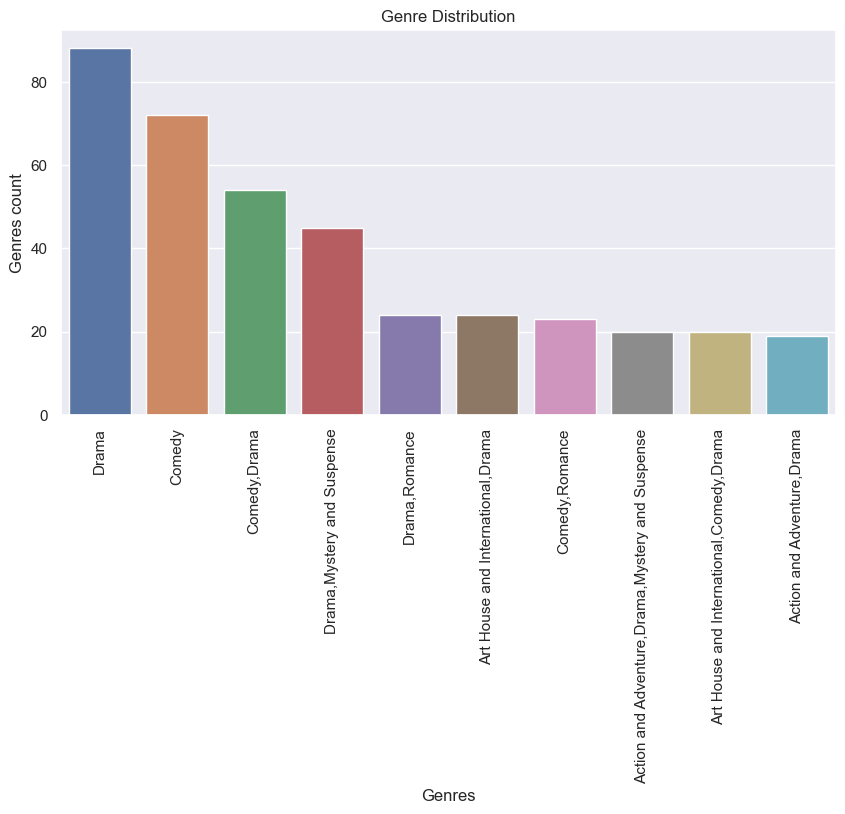

In [36]:
# A barplot showing :
# genre is the most produced and watched
# Set up plots
sns.set(font_scale = 1)
fig, ax = plt.subplots(ncols=1, figsize=(10, 5))
# Create variables for easier reuse
value_counts = movies_df["genre"].value_counts()
top_10_counts = value_counts.iloc[:10]

# Plot data
ax =sns.barplot(x=top_10_counts.index, y=top_10_counts.values)

# Customize appearance
ax.tick_params(axis="x", labelrotation=90)

ax.set_ylabel("Genres count")
ax.set_xlabel("Genres")
ax.set_title("Genre Distribution")
sns.set_context('paper');

The most watched movie genre is Drama, then comedy, then comedy|Drama but this doesn't mean that they are the most rated
Let me checkout how this genres are rated and still the most profitable

In [37]:
# Getting the value counts of the rating column
movies_df["rating"].value_counts()

rating
R        367
PG-13    174
NR       165
PG       145
G         29
NC17       1
Name: count, dtype: int64

In [38]:
# Assuming movies_df is your DataFrame and it has columns 'genre' and 'rating'

# Group by 'genre' and 'rating', and count the number of movies in each group
grouped_df = movies_df.groupby(["genre", "rating"]).size().reset_index(name="count").head(15).sort_values(by ="count",ascending =False)
grouped_df


,genre,rating,count
3,Action and Adventure,R,3
12,"Action and Adventure,Animation,Kids and Family...",PG,3
0,Action and Adventure,NR,2
8,"Action and Adventure,Animation,Comedy,Kids and...",PG,2
1,Action and Adventure,PG,1
2,Action and Adventure,PG-13,1
4,"Action and Adventure,Animation,Art House and I...",R,1
5,"Action and Adventure,Animation,Classics,Comedy...",G,1
6,"Action and Adventure,Animation,Comedy,Drama,Ki...",G,1
7,"Action and Adventure,Animation,Comedy,Drama,Ki...",G,1


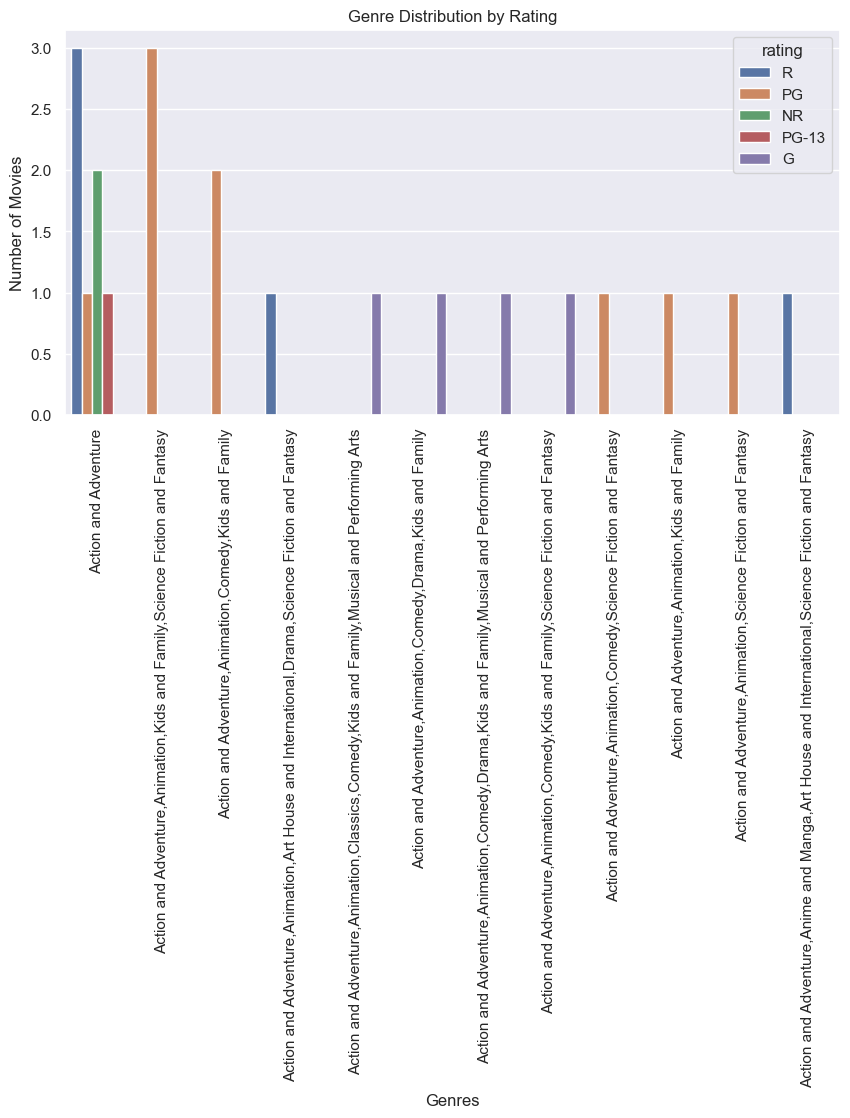

In [39]:
# This is a barplot showing the relationship between genres and ratings in terms of wether rating is R, NR,PG, PG-13,G
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(font_scale=1)
fig, ax = plt.subplots(ncols=1, figsize=(10, 5))

# Plot data
# value_counts =
sns.barplot(x="genre", y="count", hue="rating", data=grouped_df, ax=ax)

# Customize appearance
ax.tick_params(axis="x", labelrotation=90)
ax.set_ylabel("Number of Movies")
ax.set_xlabel("Genres")
ax.set_title("Genre Distribution by Rating")

# Set the context
sns.set_context("paper")

# Show the plot
plt.show()

Action and adventure is the most rated movie genre accross all the ratings that is R rating that is the restricted movies is the most watched
In terms of genres with PG rating Action and Adventure, Animation, Kids and Family, Science fiction and Fantasy is the most watches
In terms of NR rating Action and adventure is the most watched


In [40]:
# Clean the "runtime" column by removing the "minutes" and convert the datatype of "runtime" to string
movies_df["runtime"] = movies_df["runtime"].str.replace("minutes","").astype(int)

movies_df["runtime"].dtype

dtype('int32')

- Now I will focus on the Combined_df dataset

In [42]:
# Reading the first three rows of the combined_df dataset
combined_df.head(3)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517


I will focus on the original_title, runtime_minutes, genres, averagerating, numvotes

In [43]:
# Grouping the genres by mean numvotes
value_counts = combined_df.groupby("genres")["numvotes"].mean().sort_values(ascending =False).head(10)
value_counts = value_counts.iloc[:6]

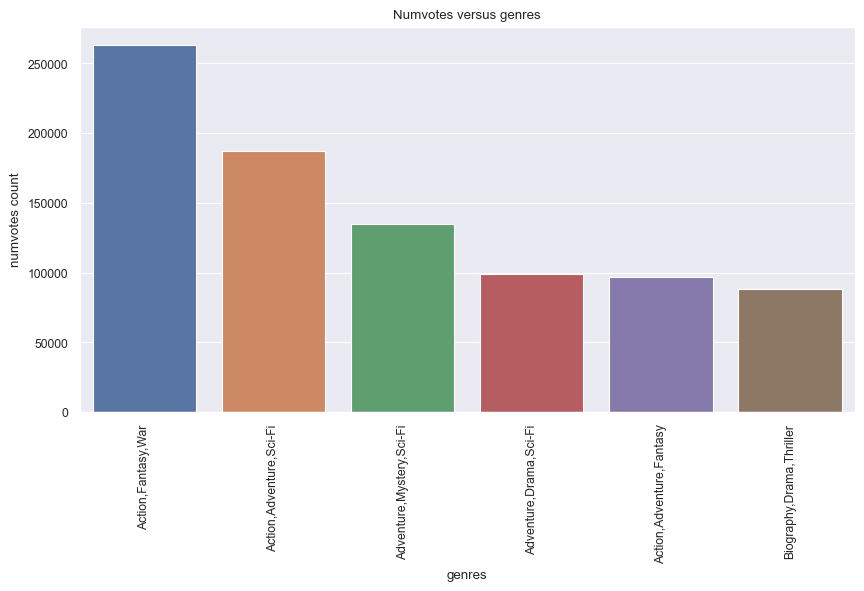

In [44]:
#  A barplot showing numvotes against genres
fig, ax =plt.subplots(figsize =(10,5))

ax = sns.barplot(x = value_counts.index, y = value_counts.values)
ax.tick_params(axis = "x", labelrotation=90)

ax.set_ylabel("numvotes count")
ax.set_xlabel("genres")
ax.set_title("Numvotes versus genres")
sns.set_context("paper");

Drama  then comedy has the most number of votes and according to the analysis that I did just before this on the most watches movies genres Drama is the most watched then followed by comedy

 - #### Correlation

In [45]:
# Finding the correlation between runtime minutes, averagerating and numvotes
corr = combined_df[["runtime_minutes", "averagerating", "numvotes"]]
corr_data =corr.corr()
corr_data

,runtime_minutes,averagerating,numvotes
runtime_minutes,1.000000,-0.007076,0.012428
averagerating,-0.007076,1.000000,0.048756
numvotes,0.012428,0.048756,1.000000


runtime_minutes, averagerating and runtime has no correlation to each other

In [46]:
# Grouping the genres by mean averagerating
value_counts = combined_df.groupby("genres")["averagerating"].mean().sort_values(ascending =False).head(10)
value_counts = value_counts.iloc[:6]

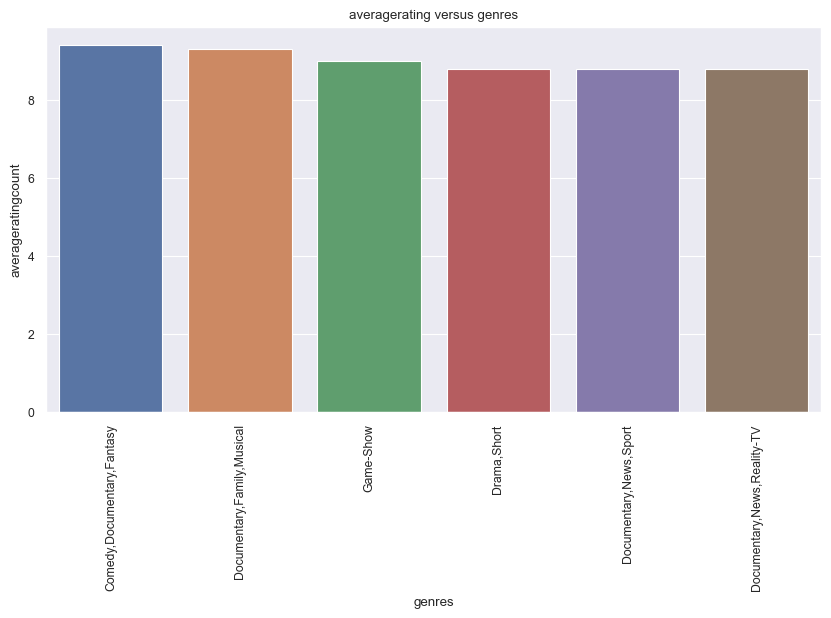

In [47]:
fig, ax =plt.subplots(figsize =(10,5))

ax = sns.barplot(x = value_counts.index, y = value_counts.values)
ax.tick_params(axis = "x", labelrotation=90)

ax.set_ylabel("averageratingcount")
ax.set_xlabel("genres")
ax.set_title("averagerating versus genres")
sns.set_context("paper");

There is no so much difference between the ratings of the movie genres above because they all almost slightly equal to each other
But I can conclude that Comedy,Documentary,Fantasy followed closely by Documentary,Family,Musical movie genres are the most rated


- Now i will focus on the Budgets_df dataset

In [59]:
# Reading the budgets df dataset
budgets_df.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,domestic_earning_status
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,Success
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,Loss
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,Loss
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,Success
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,Success


#### Correlation analysis

In [49]:
corr = budgets_df[["production_budget","domestic_gross","worldwide_gross"]]
corr_data = corr.corr()
corr_data

,production_budget,domestic_gross,worldwide_gross
production_budget,1.000000,0.685682,0.748306
domestic_gross,0.685682,1.000000,0.938853
worldwide_gross,0.748306,0.938853,1.000000


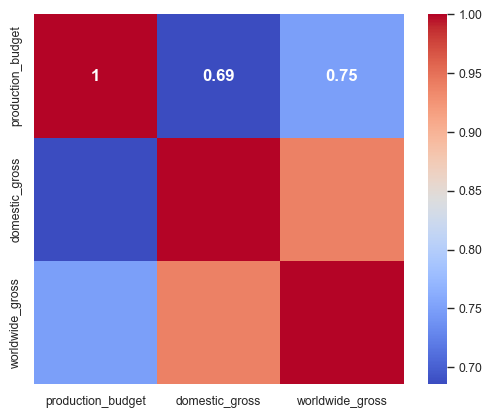

In [50]:
# Example: Adjusting vmin and vmax based on actual data range
vmin = corr_data.min().min()
vmax = corr_data.max().max()

sns.heatmap(corr_data, cmap="coolwarm", vmin=vmin, vmax=vmax, annot=True, square=True,
            annot_kws={"fontsize": 12, "fontweight": "bold"})
plt.show()

- Production budget is moderately positively correlated with worldwide_gross
- Domestic_gross is positively correlated with worldwide_gross
- Domestic_gross is moderately positively correlated with production_budget

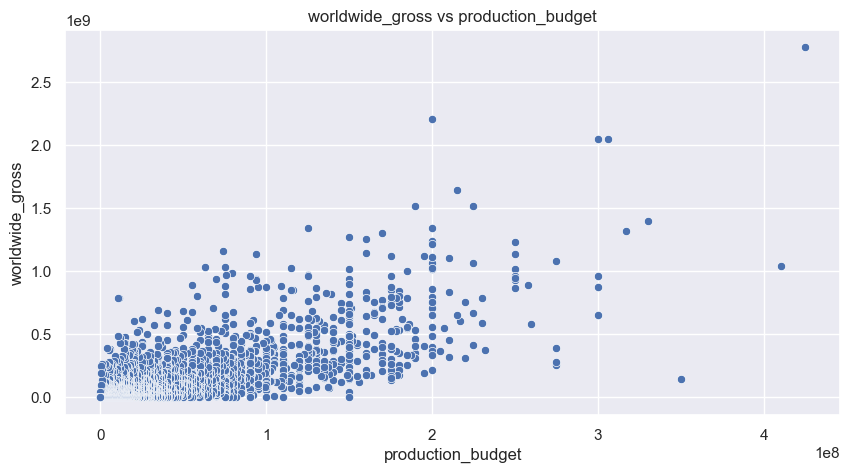

In [51]:
# Create ScatterPlot showing the relationship between production_budget and worldwide_gross
sns.set_style("darkgrid")
sns.set(font_scale = 1)
fig, ax = plt.subplots(figsize = (10,5))
# ax = sns.regplot(x = 'Revenue', y = 'Budget', data = df)

# edit for presentation purpose
ax = sns.scatterplot(x = "production_budget", y = "worldwide_gross" ,data = budgets_df)

ax.set_title("worldwide_gross vs production_budget")
ax.set_xlabel("production_budget") 
ax.set_ylabel("worldwide_gross");

# There is a high positive correlation between worldwide_gross and production_budget

- Results showing as worldwide_gross and the production_budget increases a movie company is likely to have more success

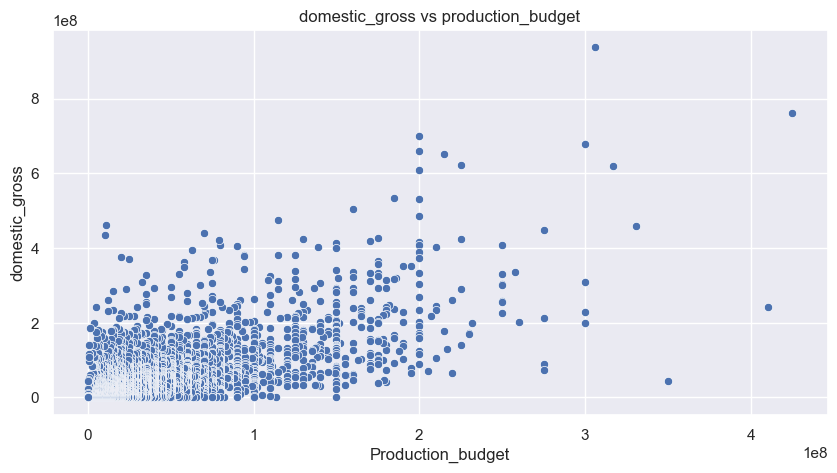

In [52]:
# Create ScatterPlot showing the relationship between production_budget and domestic_gross
sns.set_style("darkgrid")
sns.set(font_scale = 1)
fig, ax =plt.subplots(figsize = (10,5))
# ax = sns.regplot(x = 'Revenue', y = 'Budget', data = df)

# edit for presentation purpose
ax = sns.scatterplot(x = "production_budget", y = "domestic_gross" ,data = budgets_df)

ax.set_title("domestic_gross vs production_budget")
ax.set_xlabel("Production_budget") 
ax.set_ylabel("domestic_gross");

# There is a high positive correlation between domestic_gross and production_budget

- Results showing as domestic_gross and the production_budget increases a movie company is likely to have more success

#### Exploring a new feature

In [61]:
# Exploringa new feature domestic_profit
budgets_df["domestic_profit"] =budgets_df["domestic_gross"] - budgets_df["production_budget"]

In [54]:
# Creating another column Earning status that says wether a microsoft will get more profit or loss
# Creating another column based on profit or loss
budgets_df["domestic_earning_status"]=budgets_df["domestic_profit"].map(lambda x: "Success" \
                                       if x >= 0 else "Loss")

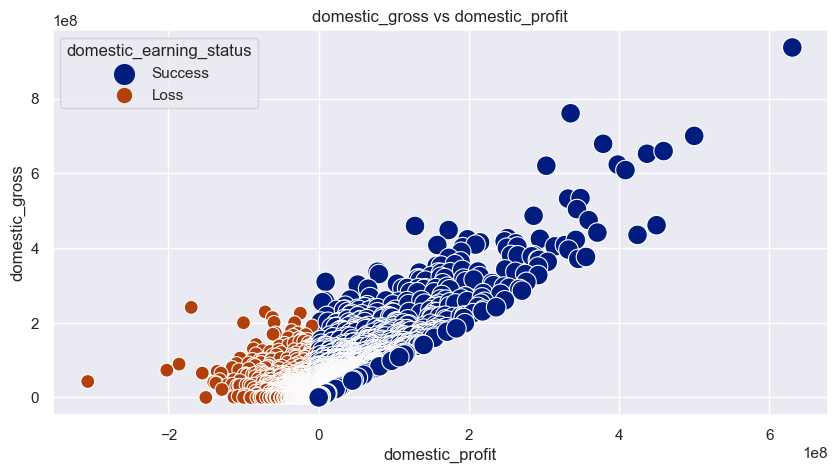

In [66]:
# Plotting a scatter plot domestic_profit and domestic_gross
# Create ScatterPlot showing the relationship between domestic_profit and domestic_gross
sns.set_style("darkgrid")
sns.set(font_scale = 1)
fig, ax = plt.subplots(figsize = (10,5))


# edit for presentation purpose
ax = sns.scatterplot(x = "domestic_profit", y = "domestic_gross" ,data = budgets_df,
                    hue = "domestic_earning_status",palette ="dark",sizes = (100,200),size = "domestic_earning_status")


ax.set_title("domestic_gross vs domestic_profit")
ax.set_xlabel("domestic_profit") 
ax.set_ylabel("domestic_gross");

# There is a high positive correlation between domestic_gross and production_budget

Microsoft is likely to get more profit when the product budget is high

In [68]:
# Exploringa new feature world_profit
budgets_df["world_profit"] =budgets_df["worldwide_gross"] - budgets_df["production_budget"]

In [69]:
# Creating another column Earning status that says wether a microsoft will get more profit or loss
# Creating another column based on profit or loss according to the worldwide_gross
budgets_df["world_earning_status"]=budgets_df["world_profit"].map(lambda x: "Success" \
                                       if x >= 0 else "Loss")

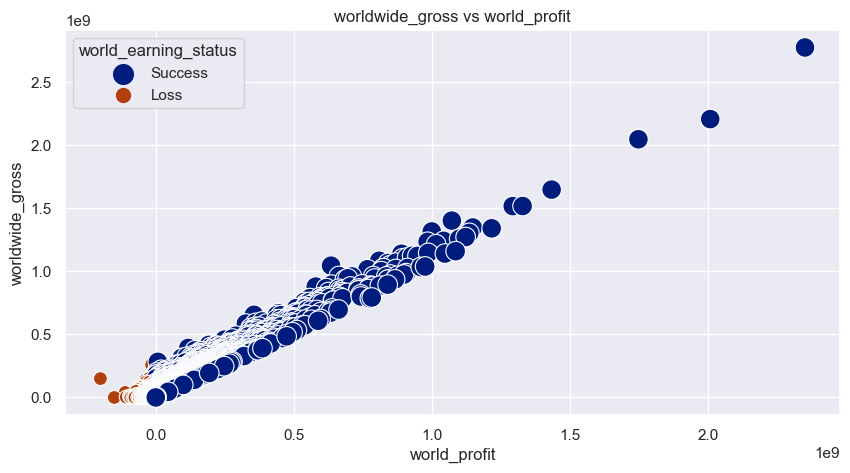

In [ ]:
# Plotting a scatter plot domestic_profit and domestic_gross
# Create ScatterPlot showing the relationship between domestic_profit and domestic_gross
sns.set_style("darkgrid")
sns.set(font_scale = 1)
fig, ax = plt.subplots(figsize = (10,5))


# edit for presentation purpose
ax = sns.scatterplot(x = "world_profit", y = "worldwide_gross" ,data = budgets_df,
                    hue = "world_earning_status",palette ="dark",sizes = (100,200),size = "world_earning_status")


ax.set_title("worldwide_gross vs world_profit")
ax.set_xlabel("world_profit") 
ax.set_ylabel("worldwide_gross");

# There is a high positive correlation between domestic_gross and production_budget

Microsoft is likely to get more profit when the product budget is high

In [63]:
# Grouping the movies by domestic_profit
value_counts = budgets_df.groupby("movie")["domestic_profit"].mean().sort_values(ascending =False).head(10)
value_counts = value_counts.iloc[:6]

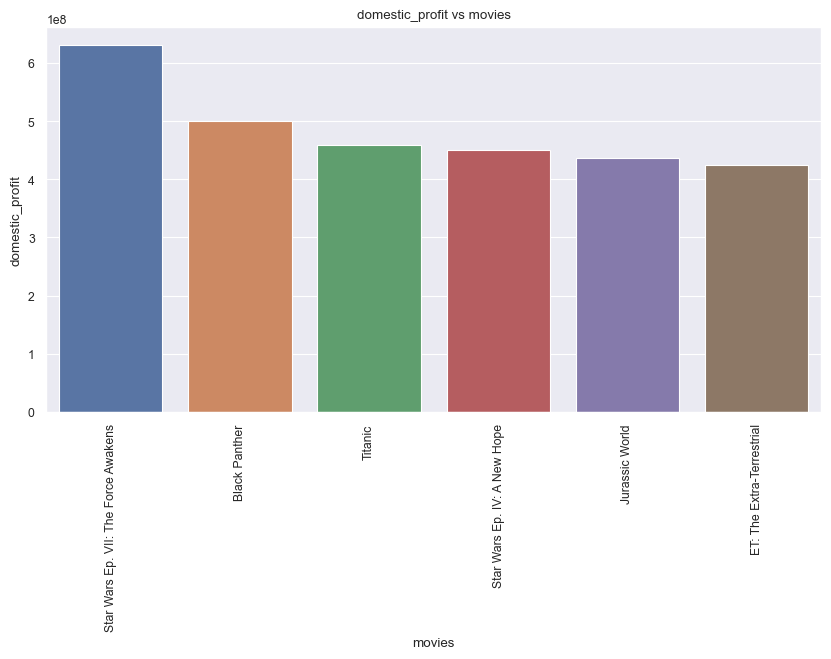

In [65]:
fig, ax =plt.subplots(figsize =(10,5))

ax = sns.barplot(x = value_counts.index, y = value_counts.values)
ax.tick_params(axis = "x", labelrotation=90)

ax.set_ylabel("domestic_profit")
ax.set_xlabel("movies")
ax.set_title("domestic_profit vs movies")
sns.set_context("paper");

In [70]:
# Grouping the movies by world_profit
value_counts = budgets_df.groupby("movie")["world_profit"].mean().sort_values(ascending =False).head(10)
value_counts = value_counts.iloc[:6]

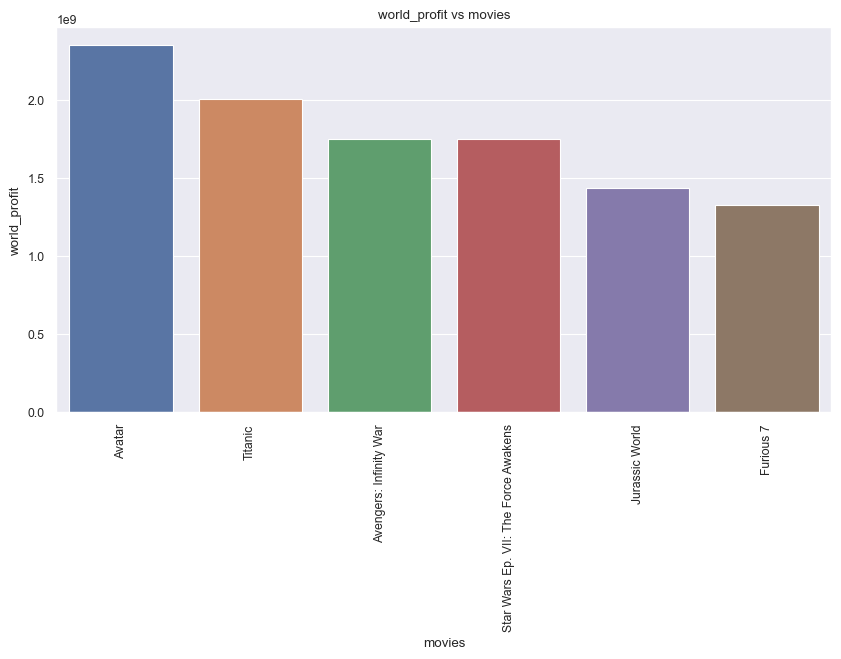

In [72]:
fig, ax =plt.subplots(figsize =(10,5))

ax = sns.barplot(x = value_counts.index, y = value_counts.values)
ax.tick_params(axis = "x", labelrotation=90)

ax.set_ylabel("world_profit")
ax.set_xlabel("movies")
ax.set_title("world_profit vs movies")
sns.set_context("paper");

### Conclusion

#### Recommendations
1.According to the most watched genre I will recommend Microsoft to focus on Drama, Comedy,Drama|Comedy then Drama,Myestry,Suspense.Films created related to the movie genre above are likely to do well.

2.According to votes count from movie fans I will recommend microsoft to focus on 
Action,Fantasy,war and Action, Adventure,Sci-FI and Adventure,Mystery, SciFi movie genres because they are the best three movie genres with the most votes from movie fans

3.My analysis on domestic gross I have come to conclusion that Star Ep VII: The Force Awakens then the Black Panther movie are doing well at the box office, So I will recommend Microsoft to Focus on the Movie genres related to he above movies

4.My analysis on Worldwide gross Avatar,Titanic,Avengers:Infinity War,Star Ep VII: The Force Awakens are doing well at the worldwide box office.I will recommend Microsoft to Focus on the genres related to the movies above

### Future Work
#### Further Analysis
- conduct analysis on related datasets to find other recommenations to make microsoft more successful after they have already started producing their own films
Examples of the next step will be:

1. Companies to co-operate with
2. The best month to produce movies
3.Movie Directors that Microsoft can Work with


